# 의사결정나무_분류 11/19 A1_노선호_빅데이터2_4일차

### 모듈 import

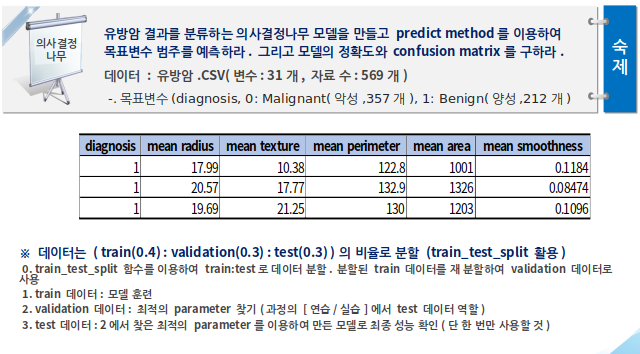

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale,minmax_scale,robust_scale
#%matplotlib inline background 그래프 실행 및 결과 확인
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
#예측
from sklearn.tree import export_graphviz 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
#모델 성능 평가
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#confusion matrix
from sklearn.metrics import confusion_matrix

#Scale 변환:평균,표준편차 기준
from sklearn.preprocessing import StandardScaler
#주성분 분석
from sklearn.decomposition import PCA
#회귀분석
import statsmodels.api as sm
#RMSE:root mean squared error 함수
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))
#MAPE:mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
#분류 : KNN
from sklearn.neighbors import KNeighborsClassifier
#로지스틱 회귀
from statsmodels.api import Logit
#데이터 분항
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from IPython.core.display import display, HTML
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import export_graphviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz 2.44.1/bin/"
display(HTML("<style>.container { width:100% !important; }</style>"))


In [2]:
plt.rcParams['font.family']='NanumGothic'

#  STEP1 데이터 불러오기

In [3]:
df=pd.read_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/유방암.csv",engine='python',encoding='cp949')
df.head()
## 데이터의 앞부분 5개를 확인

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.tail()
## 데이터의 뒷부분 5개를 확인

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
df.isnull().sum()
# 결측값이 있는지 확인

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [6]:
df.describe()
#describe() 함수로 데이터들의 정보를 한눈에 확인해보기

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# 데이터 구성하기 - 데이터 분할 

In [7]:
df_dummy = pd.get_dummies(df)
df_dummy.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df_x=df_dummy.drop("diagnosis", axis=1, inplace=False) #설명변수 설정
df_y=df_dummy["diagnosis"] #목표변수 설정

In [9]:
df_tra_x, df_test_x, df_tra_y,df_test_y = train_test_split(df_x,df_y, test_size=0.3 , random_state=1234)
df_train_x,df_validation_x,df_train_y,df_validation_y = train_test_split(df_tra_x,df_tra_y,test_size=3/7,random_state = 1234)
# 기본 x,y의 데이터를 train:test= 7:3으로 나누고 train 을 다시 한번 train: validation = 4/7:3/7 로 나눴다.

In [10]:
print('train_x 의 모양 :{}'.format(df_train_x.shape))
print('train_y 의 모양 :{}'.format(df_train_y.shape))
print('test_x 의 모양 :{}'.format(df_test_x.shape))
print('test_y 의 모양 :{}'.format(df_test_y.shape))
print('validation_x 의 모양 :{}'.format(df_validation_x.shape))
print('validation_y 의 모양 :{}'.format(df_validation_y.shape))
# 데이터의 분할이 4:3:3 으로 잘 되었는지 확인하는 모습이다.

train_x 의 모양 :(227, 30)
train_y 의 모양 :(227,)
test_x 의 모양 :(171, 30)
test_y 의 모양 :(171,)
validation_x 의 모양 :(171, 30)
validation_y 의 모양 :(171,)


# STEP 2. 모델생성하기

In [14]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)
print("Accuracy : {:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy : {:.3f}".format(tree_uncustomized.score(df_validation_x,df_validation_y)))

# 기본 모델을 생성하여 train 데이터와 validation 데이터를 학습해본 결과 train 데이터는 100% 의 정확도가 validaion은 93.6%의 정확도가
# 나와서 따라서 Train 데이터에 과적합 되어있다.


Accuracy : 1.000
Accuracy : 0.936


In [15]:
tree_uncustomized
# 현재 생성한 모델에 대한 정보를 출력하는 모습

DecisionTreeClassifier(random_state=1234)

# STEP 2.  모델 parameter 조정

In [18]:
train_accuracy ,validation_accuracy = [],[]
para_depth = [a for a in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth=v_max_depth, random_state=1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    validation_accuracy.append(tree.score(df_validation_x,df_validation_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] =para_depth
df_accuracy_depth["TrainAccuracy"]=train_accuracy
df_accuracy_depth['test_accuracy']=validation_accuracy

In [19]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,test_accuracy
0,1,0.943,0.912
1,2,0.982,0.942
2,3,0.982,0.942
3,4,0.996,0.936
4,5,1.000,0.936
5,6,1.000,0.936
6,7,1.000,0.936
7,8,1.000,0.936
8,9,1.000,0.936
9,10,1.000,0.936


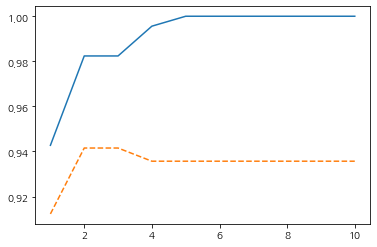

In [20]:
plt.plot(para_depth, train_accuracy, linestyle = '-', label= 'Train_accuracy')
plt.plot(para_depth, validation_accuracy, linestyle = '--', label = 'Validation_accuracy')

# STEP 2.  모델 parameter 조정-1)

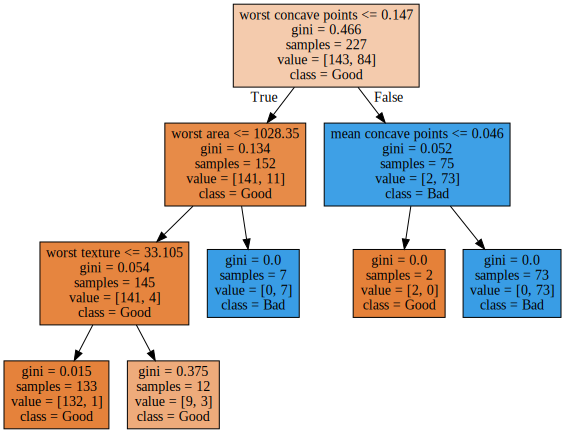

In [21]:
v_feature_name = df_train_x.columns

tree_low = DecisionTreeClassifier(max_depth = 3, random_state = 1234)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity=True, filled = True)

with open ("tree_low.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))
# 하이퍼파라미터 설정 :max_depth 를 3로 설정하고 모델 학습

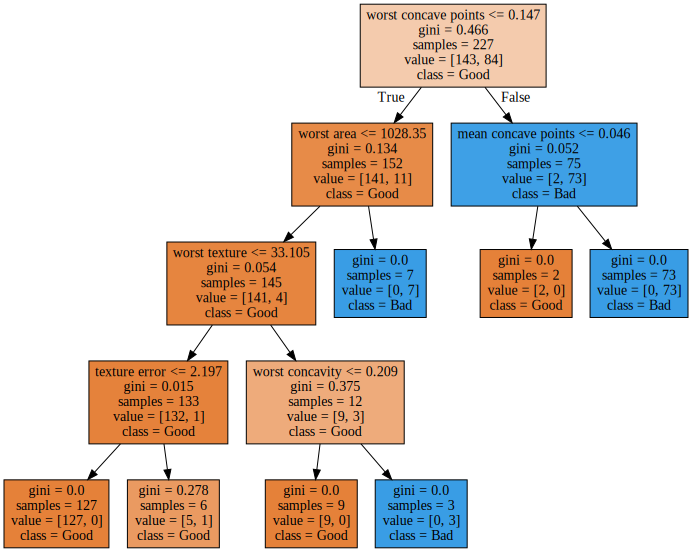

In [22]:

tree_high = DecisionTreeClassifier(max_depth = 4, random_state = 1234)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_high, out_file = "tree_high.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity=True, filled = True)

with open ("tree_high.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))
# 하이퍼파라미터 설정: max_depth를 4으로 설정하고 모델 학습

In [23]:
train_accuracy = []; validation_accuracy =[]
# 학습 정확도와 검정 정확도 저장
para_split = [n_split*10 for n_split in range(1,11)]
# 분리노드 10 부터 10단위로 100까지
for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split=v_min_samples_split, max_depth =4, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    validation_accuracy.append(tree.score(df_validation_x, df_validation_y))
# 학습도 데이터 프레임에 저장후 확인    
df_accuracy_split = pd.DataFrame()
df_accuracy_split ["MinSamplesSplit"] = para_split
df_accuracy_split ["TrainAccuracy"] = train_accuracy
df_accuracy_split ["validationAccuracy"] = validation_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,validationAccuracy
0,10,0.996,0.936
1,20,0.982,0.942
2,30,0.982,0.942
3,40,0.982,0.942
4,50,0.982,0.942
5,60,0.982,0.942
6,70,0.982,0.942
7,80,0.974,0.936
8,90,0.974,0.936
9,100,0.974,0.936


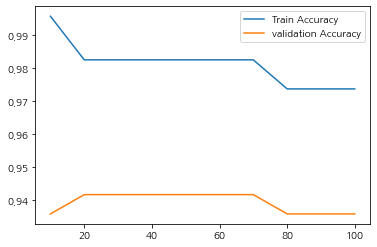

In [24]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, validation_accuracy, linestyle = "-", label = "validation Accuracy")
plt.legend()
#split 20과 80 선택

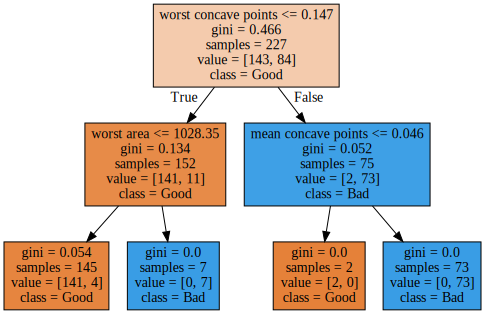

In [25]:
# 분리노드의 최소 자료 수 20 의 트리 만들기
tree_low = DecisionTreeClassifier(max_depth = 2, min_samples_split=20, random_state = 1234)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity=True, filled = True)

with open ("tree_low.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

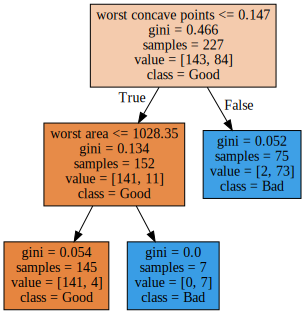

In [26]:
# 분리노드의 최소 자료 수 80 의 트리 만들기
tree_high = DecisionTreeClassifier(max_depth = 2, min_samples_split=80, random_state = 1234)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_high, out_file = "tree_high.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity=True, filled = True)

with open ("tree_high.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

#최종적으로 80으로 결정

In [27]:
train_accuracy = []; validation_accuracy =[]
# 학습 정확도와 검증 정확도 저장하는 리스트 저장
para_leaf = [n_leaf*2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split=80, max_depth =2, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    validation_accuracy.append(tree.score(df_validation_x, df_validation_y))

# 학습 정확도 및 검증 정화고 저장하는 데이터 프레임 만들고 확인하기.
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf ["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf ["TrainAccuracy"] = train_accuracy
df_accuracy_leaf ["validationAccuracy"] = validation_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,validationAccuracy
0,2,0.974,0.936
1,4,0.974,0.936
2,6,0.974,0.936
3,8,0.969,0.930
4,10,0.969,0.930
5,12,0.960,0.936
6,14,0.952,0.924
7,16,0.943,0.912
8,18,0.943,0.912
9,20,0.943,0.912


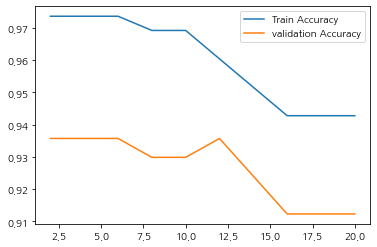

In [28]:
# 그래프로 확인하기 
plt.plot(para_leaf, train_accuracy, linestyle="-", label = "Train Accuracy")
plt.plot(para_leaf, validation_accuracy, linestyle="-", label = "validation Accuracy")
plt.legend()
#leaf 8과 12로 결정

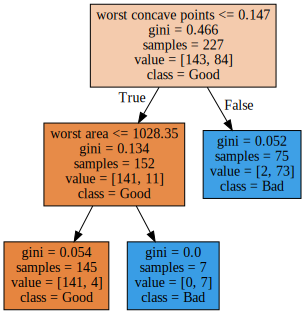

In [29]:
# 하이퍼파라미터 min_samples_leaf 4로 트리만들기
tree_low = DecisionTreeClassifier(max_depth = 2, min_samples_split=80, min_samples_leaf = 4, random_state = 1234)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity=True, filled = True)

with open ("tree_low.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

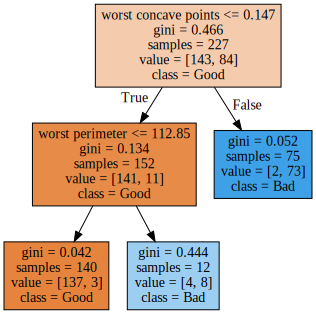

In [30]:
# 하이퍼파라미터 min_samples_leaf 12로 트리만들기
tree_high = DecisionTreeClassifier(max_depth = 2, min_samples_split=80, min_samples_leaf=12, random_state = 1234)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_high, out_file = "tree_high.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity=True, filled = True)

with open ("tree_high.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))
#최종적을 4로 결정

In [31]:
# 최종적으로 max_depth = 2, min_samples_split=80, min_samples_leaf = 4 파라미터 설정하여 DT 만들기
tree_final = DecisionTreeClassifier(max_depth = 2, min_samples_split=80, min_samples_leaf = 4, random_state=1234)
tree_final.fit(df_train_x, df_train_y)


DecisionTreeClassifier(max_depth=2, min_samples_leaf=4, min_samples_split=80,
                       random_state=1234)

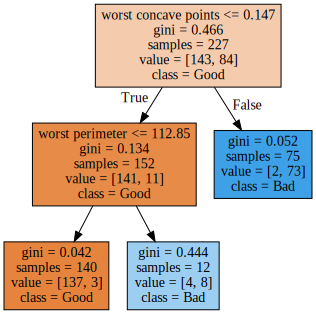

In [32]:
export_graphviz(tree_final, out_file="tree_final.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_final.dot") as f:
    dor_graph = f.read()
display(graphviz.Source(dot_graph))

In [33]:
# predict  method 이용하여 정확도와 confusion matrix 찾기
y_pred = tree_final.predict(df_test_x)
print("Accuracy: {0:3f}\n".format(tree_final.score(df_test_x, df_test_y)))
#정확도 90.64% 가 나왔다.
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test_y, y_pred))) 
#Confusion Matrix

Accuracy: 0.906433

Confusion Matrix:
[[102   3]
 [ 13  53]]


In [34]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3) 
#중요변수 확인 결과 0.929 중요도를 갖은 mean concave points 가 제일 높다 하지만 이 트리에서만 이 중요도가 유효한 것이지
# 절대적인 것은 아니다.

,Feature,Importance
27,worst concave points,0.866
23,worst area,0.134
0,mean radius,0.000
1,mean texture,0.000
28,worst symmetry,0.000
26,worst concavity,0.000
25,worst compactness,0.000
24,worst smoothness,0.000
22,worst perimeter,0.000
21,worst texture,0.000


Text(0, 0.5, '설명변수')

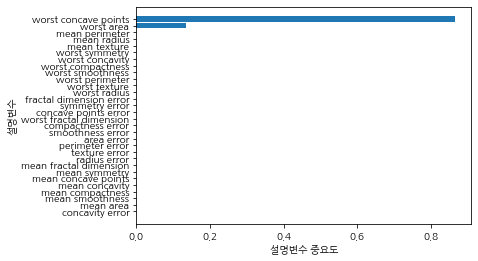

In [35]:
# 설명변수의 중요도를 위에서 수치로 확인하였지만 그래프로 다시한번 확인해보자.
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range (len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")
# 중요 설명 변수 트리 생성시  mean concave points, worst concave points 순으로 영향이 크다고 해석할 수 있다.

In [39]:

estimator = DecisionTreeClassifier()
param_grid = {"max_depth": para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs=-1)
grid_dt.fit(df_test_x, df_test_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3))) 
# GridSearchCV 로 하이퍼파라미터를 찾아본 결과 0.009% 로 다르게 나왔다.
#0.3% 정도여서 모델을 잘 만들었다고 할 수 있다.

best estimator model: 
DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, min_samples_split=30)

best parameter: 
{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 30}

best score: 
0.918


In [40]:
df_pred = pd.DataFrame({'prediction':tree_final.predict(df_test_x)}) #예측값
df_pred.describe()

,prediction
count,171.000000
mean,0.327485
std,0.470674
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [41]:
df_test_y.describe() #실제값

count    171.000000
mean       0.385965
std        0.488252
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: diagnosis, dtype: float64

# GB_유방암

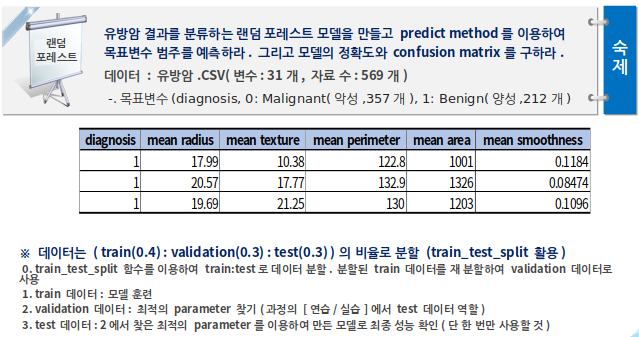

In [42]:
df_raw=pd.read_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/유방암.csv",engine='python',encoding='cp949')
df_raw.head()
## 데이터의 앞부분 5개를 확인

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [43]:
df_raw.isnull().sum()
# isnull().sum() 을 이용하여 데이터의 결측값을 확인

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

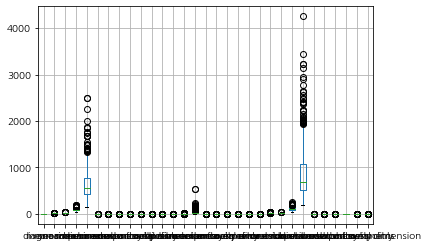

In [44]:
df_raw.boxplot()
# 이상치를 확인하였더니 4000이상을 제거해야겠다고 생각하고 제거하였다.

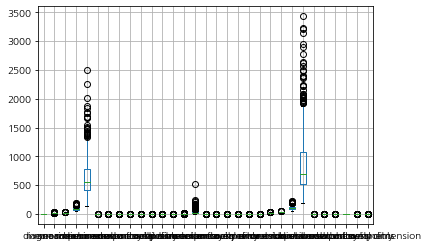

In [45]:
df_raw = df_raw[df_raw["worst area"]<4000] 
df_raw.boxplot()
# 제거후 다시 확인해본 모습

In [46]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()
# 더미변수 확인

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [47]:
df_raw_x=df_raw_dummy.drop("diagnosis", axis=1, inplace=False)
#설명변수 설정
df_raw_y=df_raw_dummy["diagnosis"]
#목표변수 설정

In [48]:

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.6, random_state =1234)
df_validation_x, df_test_x, df_validation_y, df_test_y = train_test_split(df_test_x, df_test_y, test_size = 0.5, random_state =1234)
#train : validation : test= 4:3:3 으로 설정

print(df_train_x.shape)
print(df_train_y.shape)

print(df_test_x.shape)
print(df_test_y.shape)

print(df_validation_x.shape)
print(df_validation_y.shape)

(227, 30)
(227,)
(171, 30)
(171,)
(170, 30)
(170,)


In [49]:
rf_uncustomized = RandomForestClassifier(random_state =1234)
# 랜덤포레스트 기본 모델로 학습하기
rf_uncustomized.fit(df_train_x, df_train_y)
print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on validation set: {:.3f}".format(rf_uncustomized.score(df_validation_x, df_validation_y)))
rf_uncustomized 
# validaionset 이 0.947인데 train이 100% 이기 때문에 과적합 되어 있다.

Accuracy on training set: 1.000
Accuracy on validation set: 0.947


RandomForestClassifier(random_state=1234)

In [50]:
train_accuracy = []; validation_accuracy =[]
# 테스트 정확도와 검증 정확도 데이터를 저장하기위한 공간
para_n_tree = [n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    validation_accuracy.append(rf.score(df_validation_x, df_validation_y))

# 저장한 데이터들을 확인하기위하여 데이터프레임으로 확인.
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["validationAccuracy"] = validation_accuracy

In [51]:
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,validationAccuracy
0,10,0.996,0.941
1,20,0.996,0.953
2,30,1.000,0.959
3,40,1.000,0.959
4,50,1.000,0.959
5,60,1.000,0.959
6,70,1.000,0.959
7,80,1.000,0.947
8,90,1.000,0.947
9,100,1.000,0.947


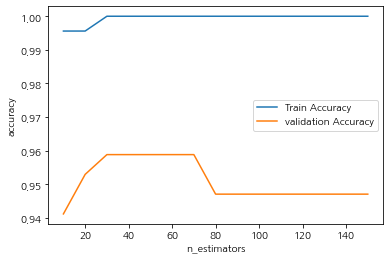

In [52]:
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, validation_accuracy, linestyle = "-", label = "validation Accuracy")
plt.xlabel("n_estimators"); plt.ylabel("accuracy")
plt.legend()
#n_tree 의 검증 데이터가 30까지 오르고 80에 다시 내려가기때문에 30으로 설정하였다.

In [53]:

oob_error = []
for v_n_estimator in range(1,151):
    rf = RandomForestClassifier(n_estimators=v_n_estimator, oob_score = True, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1-rf.oob_score_)
# 트리수 변경에 따른 모델 Out of Bag ( OOG)  변화 를 확인하기. 

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This prob

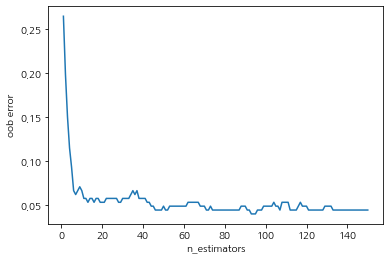

In [69]:
plt.plot(range(1, 151), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")
n_estimators=20 
# 에러가 5부터 낮아지고 20에서 부터 오차가 적기에 20으로 선택하였다. 

In [70]:
train_accuracy = []; validation_accuracy =[]
# 테스트 정확도와 검증 정확도 데이터를 저장하기위한 공간
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators= 100, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    validation_accuracy.append(rf.score(df_validation_x, df_validation_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["validationAccuracy"] = validation_accuracy
df_accuracy_depth.round(3)
#정확도의 데이터를 저장하여 확인.

,Depth,TrainAccuracy,validationAccuracy
0,1,0.943,0.941
1,2,0.969,0.941
2,3,0.982,0.953
3,4,0.991,0.953
4,5,0.996,0.947
5,6,1.000,0.953
6,7,1.000,0.947
7,8,1.000,0.947
8,9,1.000,0.947
9,10,1.000,0.947


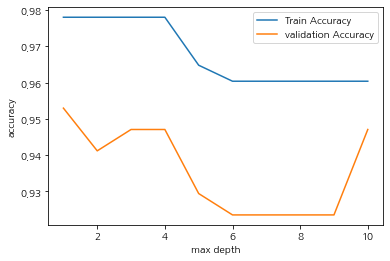

In [73]:

plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, validation_accuracy, linestyle = "-", label = "validation Accuracy")
plt.xlabel("max depth"); plt.ylabel("accuracy")
plt.legend()

# 검증데이터가 3까지 증가하고 4부터 다시 내려가기에 max_depth을 3으로 설정하였다.

In [74]:
train_accuracy = []; validation_accuracy =[]
para_split = [n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split=v_min_samples_split, max_depth =3, n_estimators =20, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    validation_accuracy.append(rf.score(df_validation_x, df_validation_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split ["MinSamplesSplit"] = para_split
df_accuracy_split ["TrainAccuracy"] = train_accuracy
df_accuracy_split ["validationAccuracy"] = validation_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,validationAccuracy
0,10,0.978,0.953
1,20,0.978,0.941
2,30,0.978,0.947
3,40,0.978,0.947
4,50,0.965,0.929
5,60,0.960,0.924
6,70,0.960,0.924
7,80,0.960,0.924
8,90,0.960,0.924
9,100,0.960,0.947


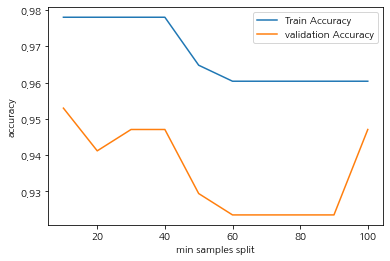

In [75]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, validation_accuracy, linestyle = "-", label = "validation Accuracy")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()
#split이 40부터 내려가기때문에 30으로 설정하였다. 

In [76]:
train_accuracy = []; validation_accuracy =[]
# 테스트 정확도와 검증 정확도 데이터를 저장하기위한 공간
para_leaf = [n_leaf* 10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf, max_depth =3, n_estimators = 20, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    validation_accuracy.append(rf.score(df_validation_x, df_validation_y))

# 정확도를 확인하기위하여 데이터프레임에 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf ["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf ["TrainAccuracy"] = train_accuracy
df_accuracy_leaf ["validationAccuracy"] = validation_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,validationAccuracy
0,10,0.969,0.947
1,20,0.965,0.953
2,30,0.965,0.953
3,40,0.965,0.947
4,50,0.947,0.906
5,60,0.943,0.894
6,70,0.938,0.924
7,80,0.621,0.676
8,90,0.621,0.676
9,100,0.621,0.676


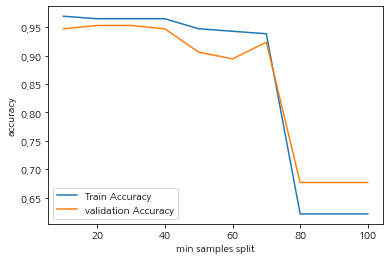

In [77]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, validation_accuracy, linestyle = "-", label = "validation Accuracy")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()


In [78]:
rf_final = RandomForestClassifier(min_samples_leaf = 20, max_depth = 4, n_estimators= 100, random_state=1234)
rf_final.fit(df_train_x, df_train_y)

y_pred = rf_final.predict(df_validation_x)
print("Accuracy on training set: {:.3f}\n".format(rf_final.score(df_validation_x, df_validation_y))) 
# 정확도 94.7% 가 나왔다.
print("Accuracy on validation set: {:.3f}\n".format(rf_final.score(df_validation_x, df_validation_y))) 
#Confusion Matrix 를 보았을 때 49개중에 6개나 나온 것을 보아 정ㅇ확도는 높지만 완벽한 모델이라고 볼 수 없다.
print("Confusion Matrix:\n{}".format(confusion_matrix(df_validation_y, y_pred)))

Accuracy on training set: 0.947

Accuracy on validation set: 0.947

Confusion Matrix:
[[112   3]
 [  6  49]]


In [62]:
v_feaure_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3) 
#중요변수 확인

,Feature,Importance
22,worst perimeter,0.193
7,mean concave points,0.139
20,worst radius,0.120
27,worst concave points,0.118
23,worst area,0.092
6,mean concavity,0.073
2,mean perimeter,0.073
0,mean radius,0.054
13,area error,0.036
3,mean area,0.029


Text(0, 0.5, '설명변수')

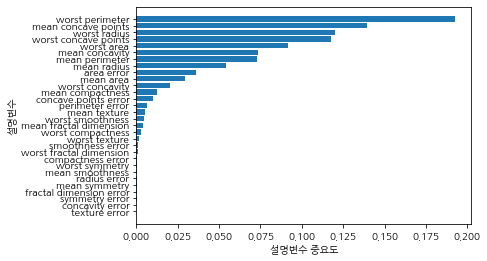

In [63]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range (len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")
# 설명변수의 중요도로 보았을때 worst perimeter , mean concave points 순으로 중요하다고 해석할 수 있다.
# 설명변수의 중요도가 높다고 하더라도 훈련데이터에 따라 중요도가 달라질 수 있기에 절대적이지 않다.

In [79]:
estimator = RandomForestClassifier(n_estimators=100,random_state=1234)
param_grid = {"max_depth": para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_rf = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs=-1)
grid_rf.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3))) 

#GridSearchCV 로 점수를 확인해본 결과 내가 만든 모델의 점수가 나쁘지 않다라는 것을 확인할 수 있다. 
# 하지만 0.09%정도 차이가 나지만 그래도 GridSearchCV 의 성능이 좋다고 볼 수 있다..

best estimator model: 
RandomForestClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=30,
                       random_state=1234)

best parameter: 
{'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 30}

best score: 
0.956


In [80]:
df_pred = pd.DataFrame({'prediction':rf_final.predict(df_test_x)}) #예측값
df_pred.describe()

,prediction
count,171.000000
mean,0.385965
std,0.488252
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [85]:
df_test_y.describe() #실제값

count    171.000000
mean       0.409357
std        0.493159
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: diagnosis, dtype: float64

In [ ]:
# 평균이 0.02정도 차이가 나는 것으로 보아 예측을 잘 했다고 볼 수 있다.
# 실제값과 예측값의 표준편차도 0.005정도 차이가 나고